In [89]:
#!/usr/bin/env python
# coding: utf-8
!pip install scikit-learn
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score
from sklearn.model_selection import train_test_split
import os

In [90]:
pip install opencv-python

In [91]:
path="C:/Users/aneesh krishna/majorProject/Training"
File=[]
for file in os.listdir(path):
    File+=[file]
print(File)


['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']


In [216]:
classes={'no_tumor':0, 'pituitary_tumor':1, 'meningioma_tumor':2,
'glioma_tumor':3}
import cv2
X= []
Y= []
for cls in classes:
    pth="C:/Users/aneesh krishna/majorProject/Training/"+cls
    for j in os.listdir(pth):
        img = cv2.imread(pth+'/'+j, 0)
        img = cv2.resize(img, (200,200))
        X.append(img)
        Y.append(classes[cls]) 
np.unique(Y)
X= np.array(X,dtype=np.float32)
Y= np.array(Y,dtype=np.float32)
pd.Series(Y).value_counts()
plt.figure(figsize=(10, 6))
plt.bar(['pituitary_tumor', 'no_tumor','meningioma_tumor','glioma_tumor'],pd.Series(Y).value_counts(),color =['blue','orange','red','purple'])
plt.title("Class Distribution")
plt.show()  
X.shape


KeyboardInterrupt: 

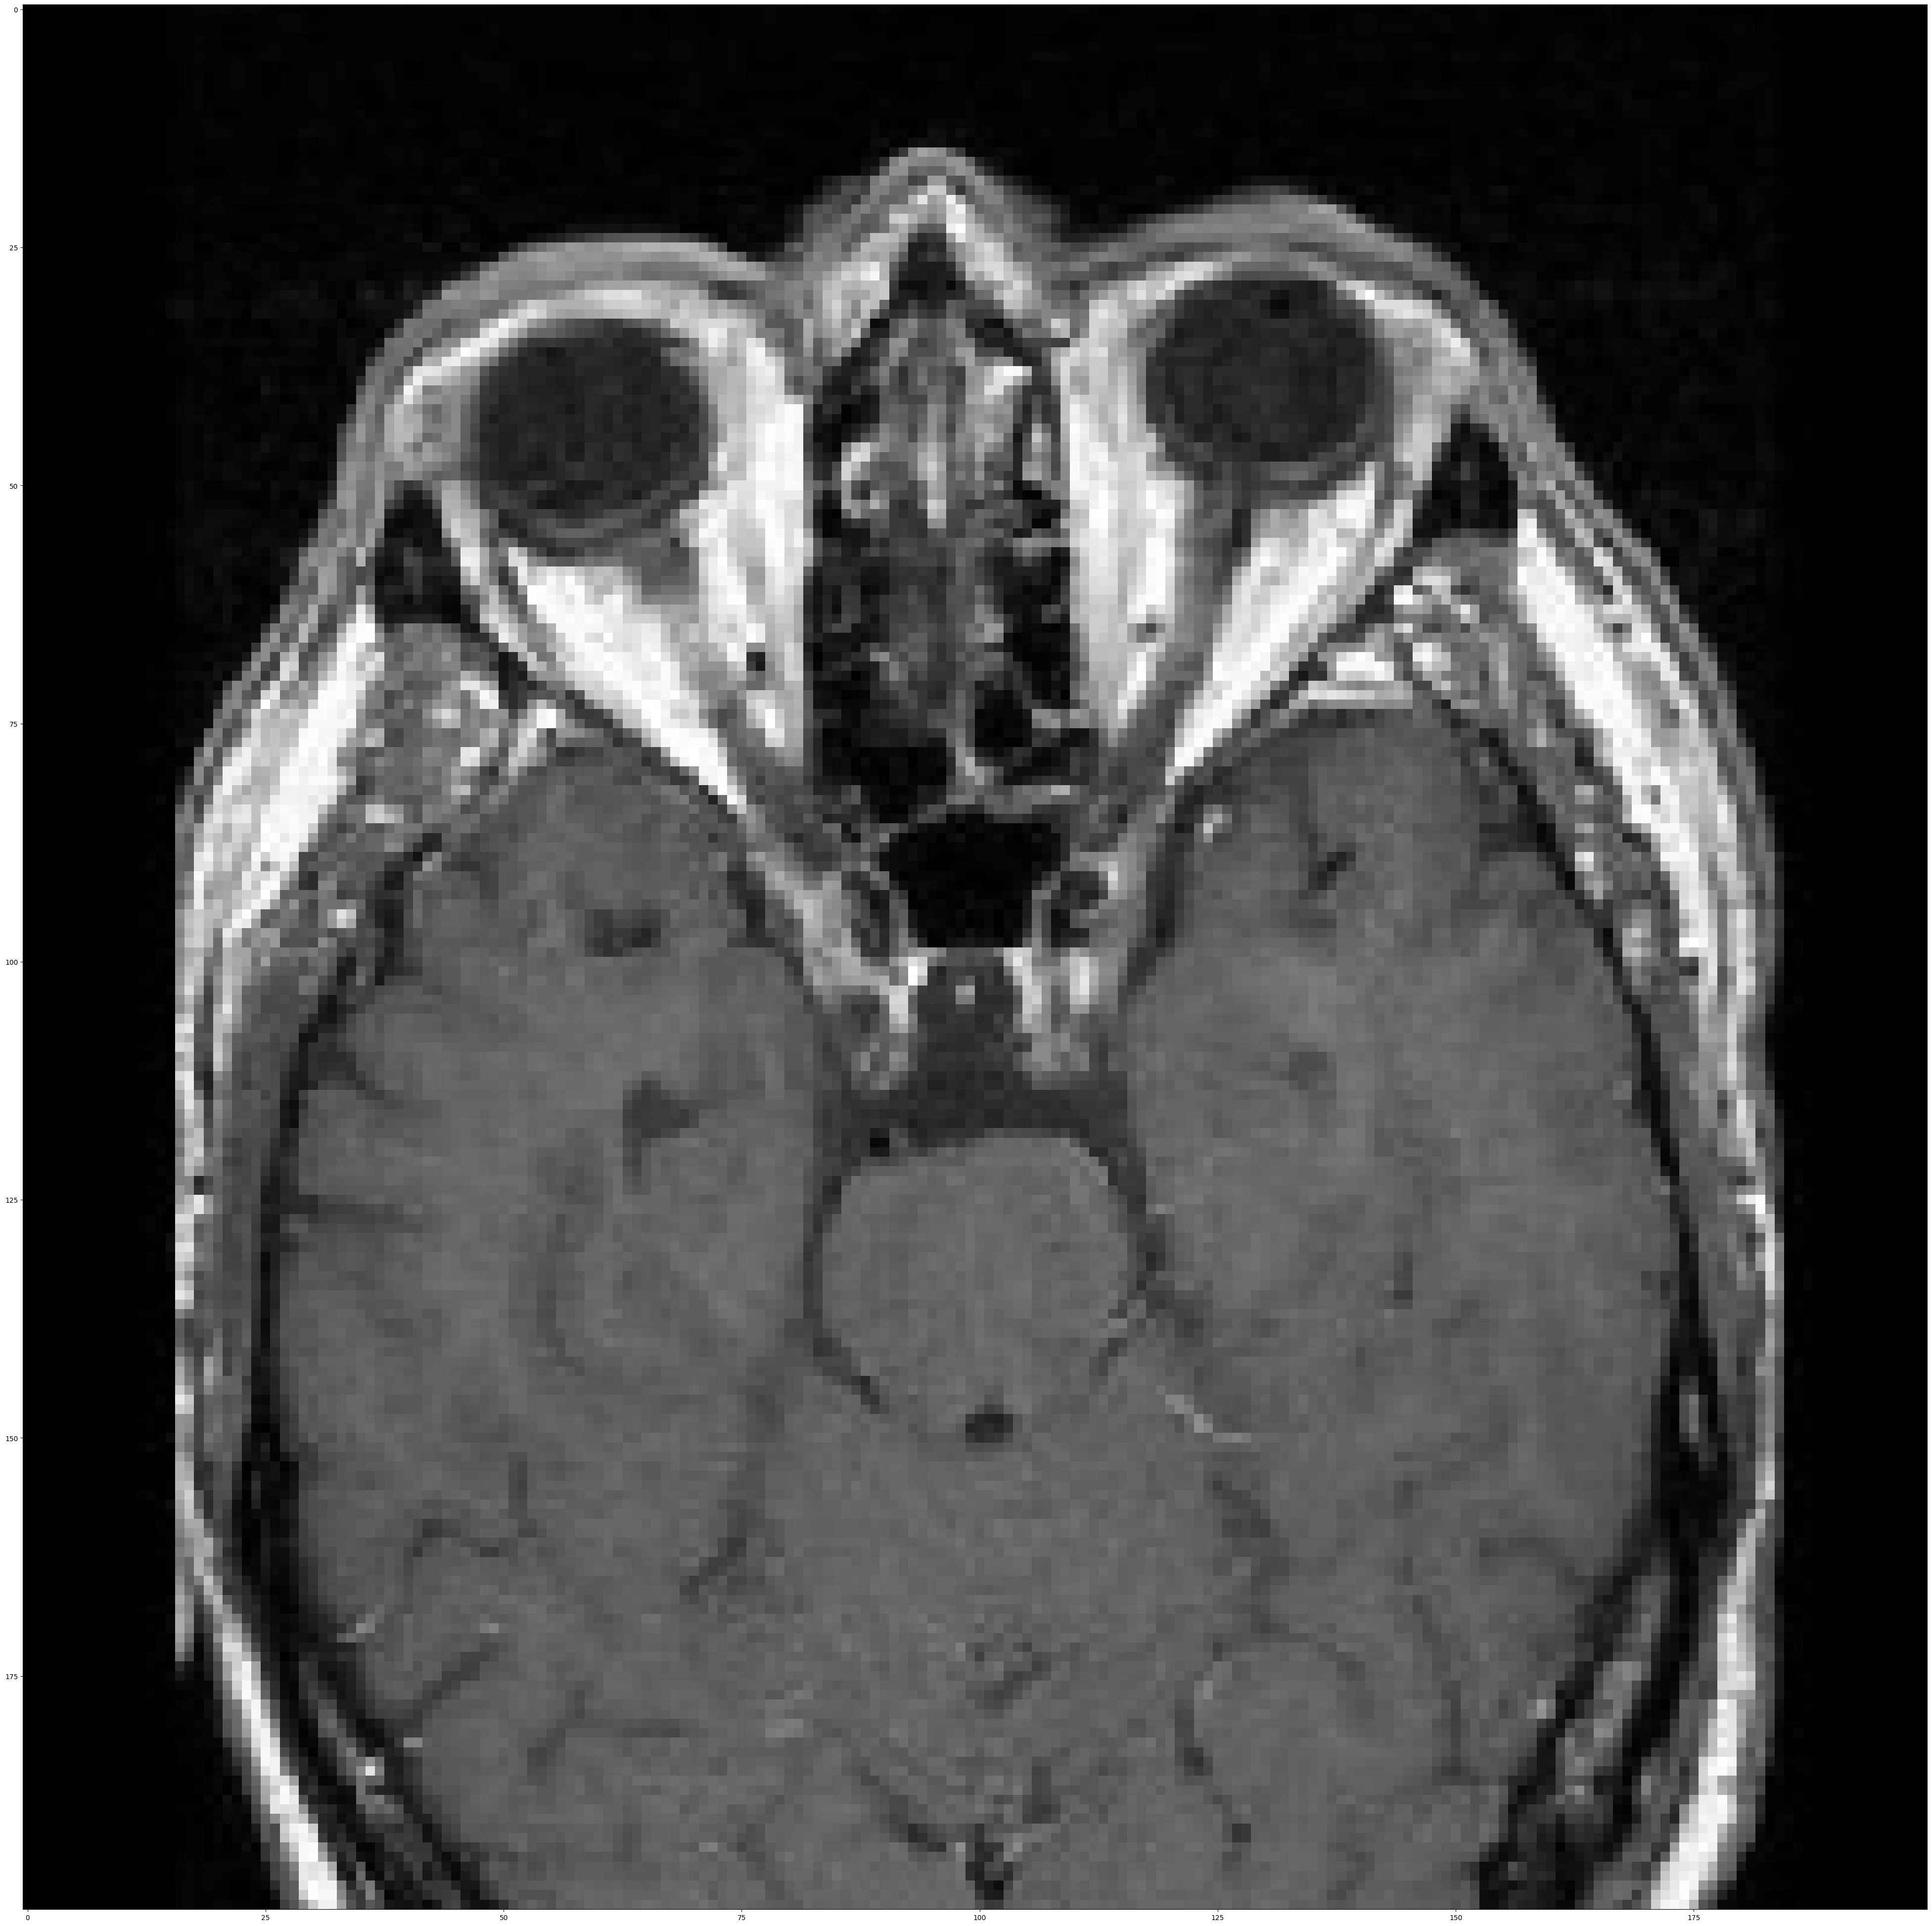

In [93]:
# In[8]:


plt.imshow(X[0], cmap='gray')


In [94]:
pip install ipywidgets

In [95]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [96]:
pip install tensorflow

In [97]:
X_updated = X.reshape(len(X), -1)
import ipywidgets as widgets
from sklearn.model_selection import train_test_split
import os
data_dir = path
categories = ['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']
for i in categories:
    path = os.path.join(data_dir, i)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img))
        img_size = 128
        image_array = cv2.resize(img_array, (img_size,img_size))
train_data = []
for i in categories:
    train_path = os.path.join(data_dir,i)
    tag = categories.index(i)
    for img in os.listdir(train_path):
        try:
            image_arr = cv2.imread(os.path.join(train_path , img),cv2.IMREAD_GRAYSCALE)
            new_image_array = cv2.resize(image_arr, (img_size,img_size))
            train_data.append([new_image_array , tag])
        except Exception as e:
            pass
X = []
y = []
for i,j in train_data:
    X.append(i)
    y.append(j)
X = np.array(X,dtype=np.float32).reshape(-1,img_size,img_size)
print(X.shape)
X = X/255.0
X = X.reshape(-1,128,128,1)
from keras.utils.np_utils import to_categorical
y_enc = to_categorical(y, num_classes = 4)
categories = ['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']
for i in categories:
    path = os.path.join(data_dir, i)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img))
        img_size = 128
        image_array = cv2.resize(img_array, (img_size,img_size))
train_data = []
for i in categories:
    train_path = os.path.join(data_dir,i)
    tag = categories.index(i)
    for img in os.listdir(train_path):
        try:
            image_arr = cv2.imread(os.path.join(train_path , img),cv2.IMREAD_GRAYSCALE)
            new_image_array = cv2.resize(image_arr, (img_size,img_size))
            train_data.append([new_image_array , tag])
        except Exception as e:
            pass
X = []
y = []
for i,j in train_data:
    X.append(i)
    y.append(j)
X = np.array(X,dtype=np.float32).reshape(-1,img_size,img_size)
print(X.shape)
X = X/255.0
X = X.reshape(-1,128,128,1)
from keras.utils.np_utils import to_categorical

y_enc = to_categorical(y, num_classes = 4)

(2870, 128, 128)
(2870, 128, 128)


In [98]:
# In[10]:


X_train , X_test, y_train, y_test = train_test_split(X , y_enc , test_size = 0.1,random_state = 42)
X_train , X_val, y_train, y_val = train_test_split(X_train , y_train , test_size =0.1, random_state = 42)
xtrain, xtest, ytrain, ytest = train_test_split(X_updated, Y, random_state=10,test_size=.20)
xtrain.shape, xtest.shape



((2296, 40000), (574, 40000))

In [99]:
# In[11]:


print(xtrain.max(), xtrain.min())
print(xtest.max(), xtest.min())
xtrain = xtrain/255
xtest = xtest/255
print(xtrain.max(), xtrain.min())
print(xtest.max(), xtest.min())


255.0 0.0
255.0 0.0
1.0 0.0
1.0 0.0


In [100]:
# In[12]:


from sklearn.decomposition import PCA
print(xtrain.shape, xtest.shape)
pca= PCA(.98)
pca_train = xtrain
pca_test = xtest

(2296, 40000) (574, 40000)


In [101]:
# In[13]:


from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier 
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB 
from sklearn.naive_bayes import GaussianNB


In [ ]:
# In[ ]:


import warnings
warnings.filterwarnings('ignore')
lg = LogisticRegression(penalty="l2", C=1, solver="saga", multi_class="auto",n_jobs=10, l1_ratio=0.5)
lg.fit(pca_train, ytrain)


LogisticRegression(C=1, l1_ratio=0.5, n_jobs=10, solver='saga')

In [ ]:
# In[ ]:


rf=RandomForestClassifier()
rf.fit(pca_train,ytrain)



RandomForestClassifier()

In [ ]:
# In[17]:


dtc=DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=70,min_samples_split=70)
dtc.fit(pca_train,ytrain)


DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=70,
                       min_samples_split=70)

In [ ]:
# In[18]:


# Naive Bayes (MultinomailNB)
mnb=MultinomialNB()
mnb.fit(pca_train,ytrain)


MultinomialNB()

In [ ]:
# In[19]:


gnb=GaussianNB()
gnb.fit(pca_train,ytrain)



GaussianNB()

Epoch 1/17
92/92 [==============================] - 219s 2s/step - loss: 1.1578 - accuracy: 0.4806 - val_loss: 1.0669 - val_accuracy: 0.5521
Epoch 2/17
92/92 [==============================] - 216s 2s/step - loss: 0.8289 - accuracy: 0.6394 - val_loss: 0.7838 - val_accuracy: 0.6448
Epoch 3/17
92/92 [==============================] - 214s 2s/step - loss: 0.6533 - accuracy: 0.7216 - val_loss: 0.8008 - val_accuracy: 0.6293
Epoch 4/17
92/92 [==============================] - 212s 2s/step - loss: 0.5548 - accuracy: 0.7664 - val_loss: 0.6904 - val_accuracy: 0.7104
Epoch 5/17
92/92 [==============================] - 213s 2s/step - loss: 0.4418 - accuracy: 0.8169 - val_loss: 0.5599 - val_accuracy: 0.7915
Epoch 6/17
92/92 [==============================] - 215s 2s/step - loss: 0.3989 - accuracy: 0.8351 - val_loss: 0.4475 - val_accuracy: 0.8263
Epoch 7/17
92/92 [==============================] - 213s 2s/step - loss: 0.3252 - accuracy: 0.8712 - val_loss: 0.6159 - val_accuracy: 0.7645
Epoch 8/17
92

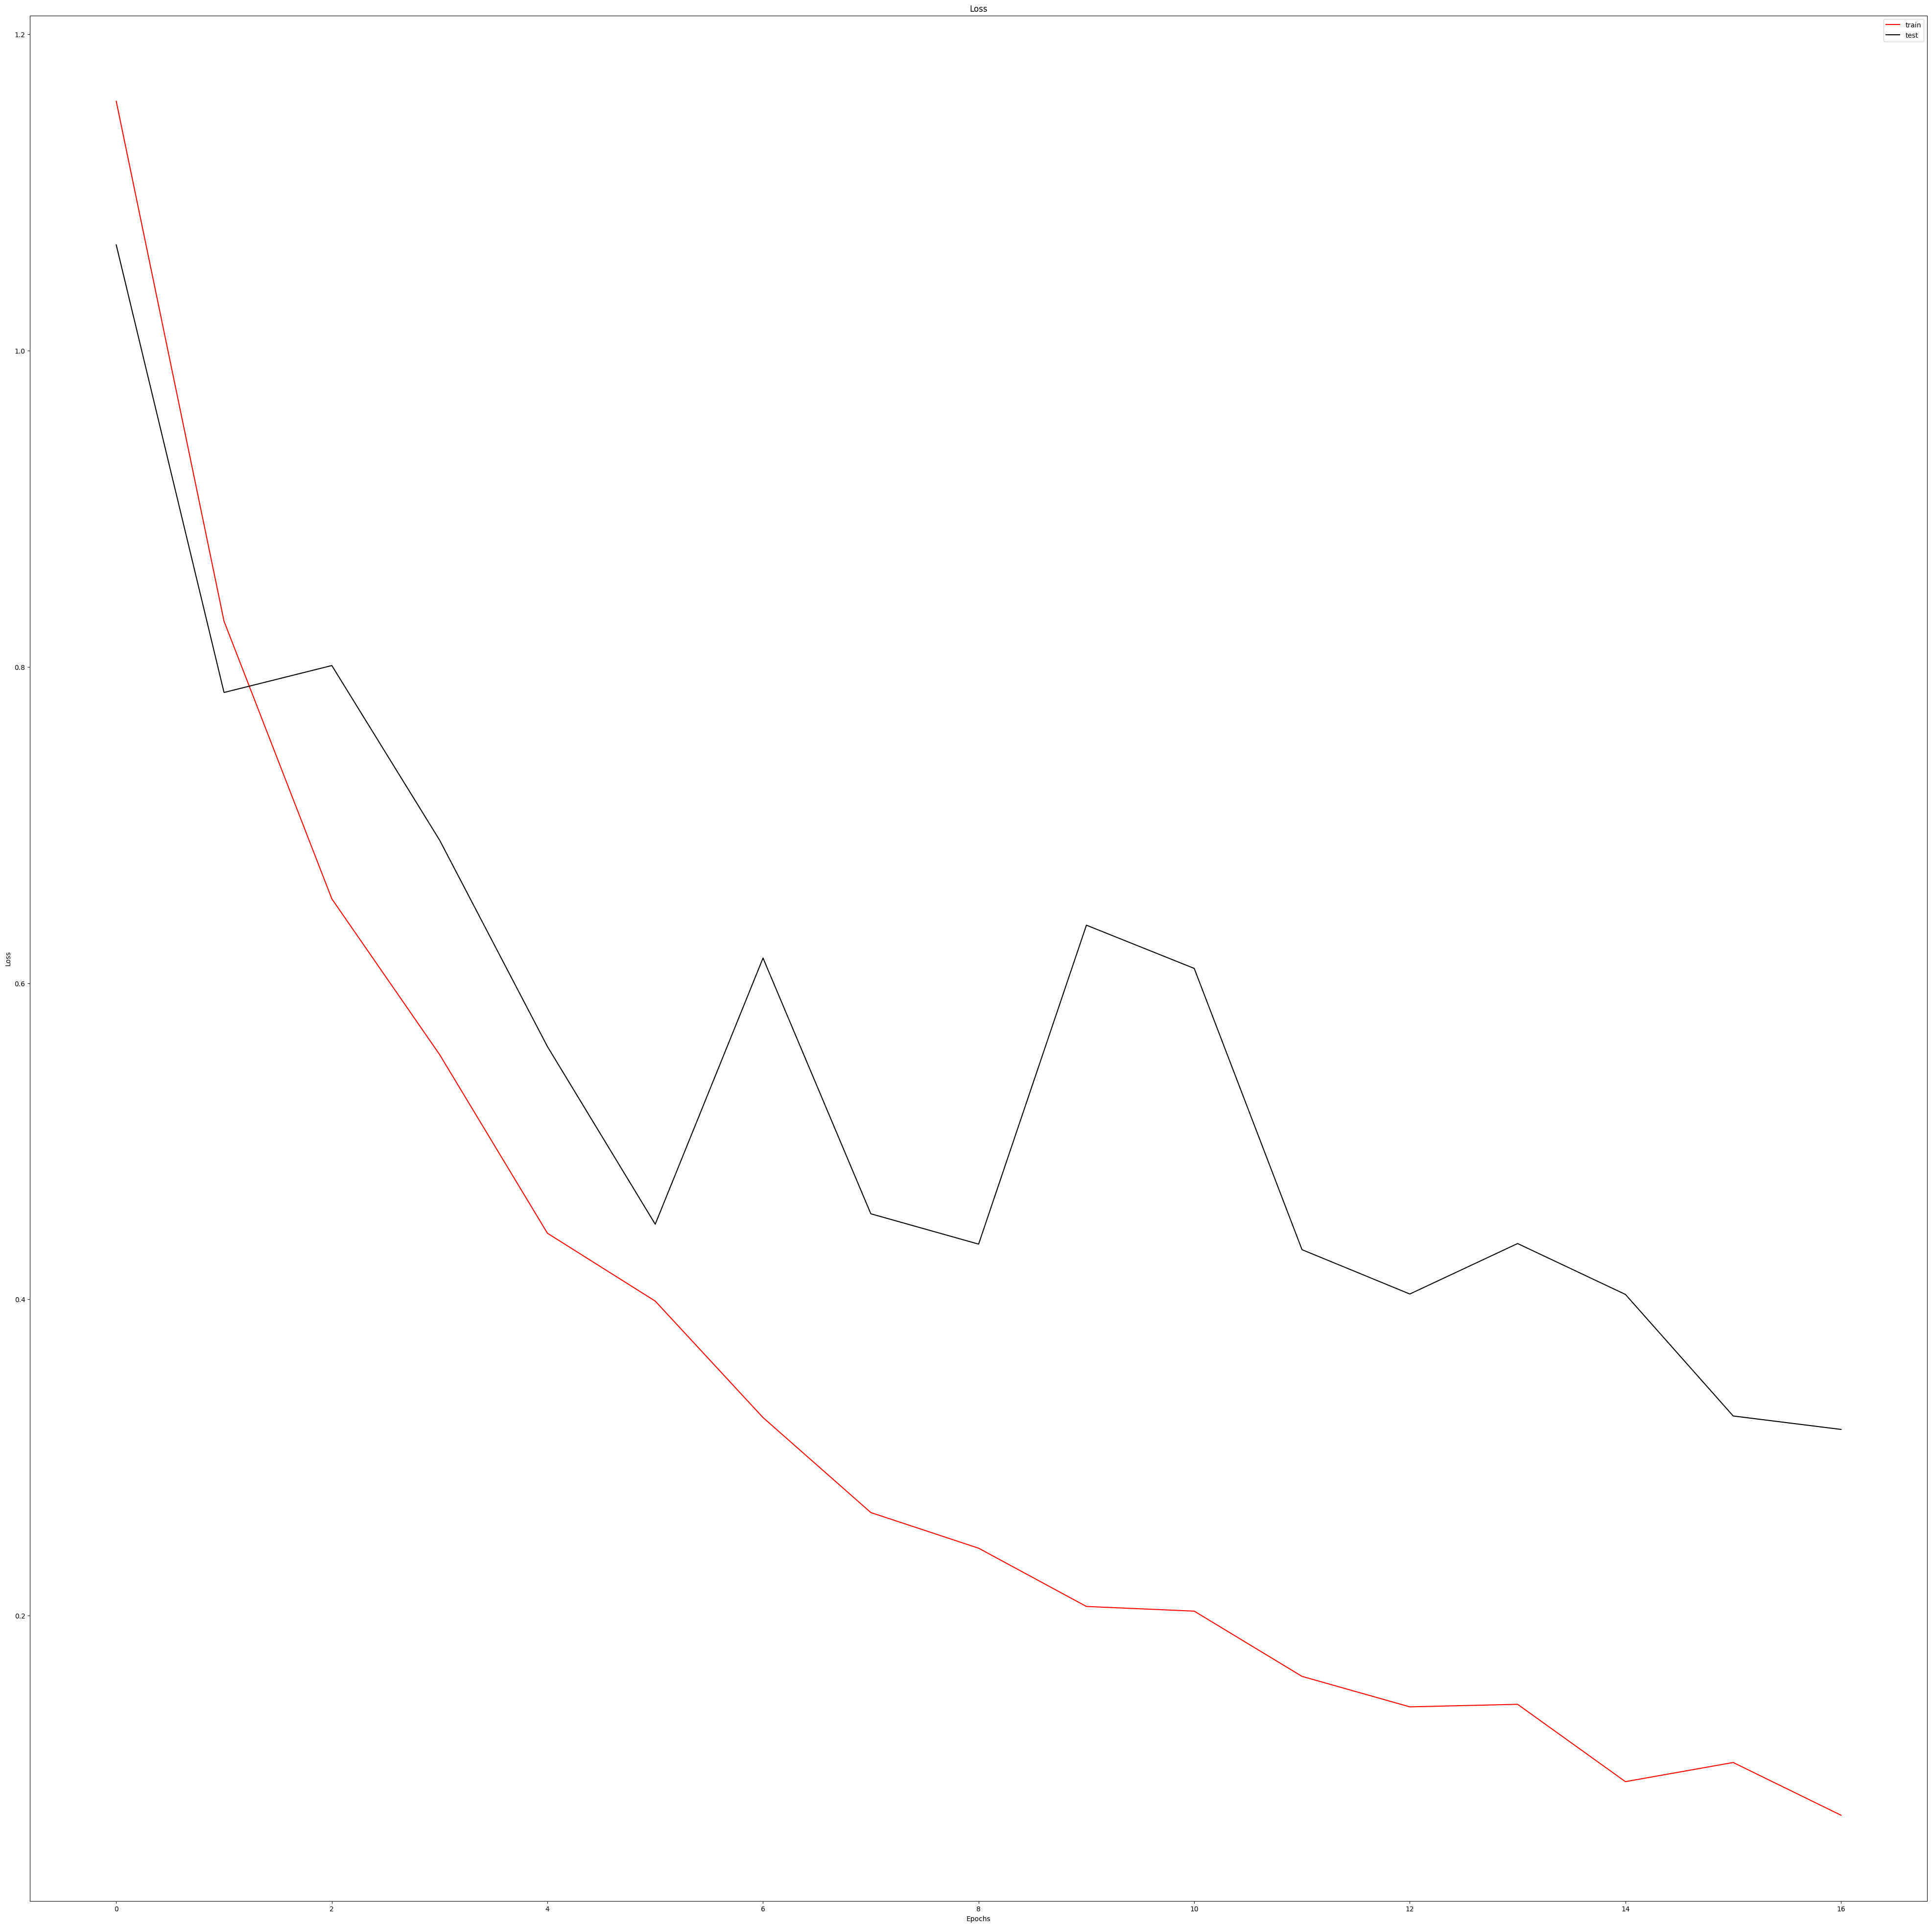

9/9 [==============================] - 6s 597ms/step
                  precision    recall  f1-score   support

    glioma_tumor       0.95      0.88      0.91        84
meningioma_tumor       0.86      0.93      0.89        89
        no_tumor       0.91      0.82      0.86        38
 pituitary_tumor       0.96      0.99      0.97        76

        accuracy                           0.92       287
       macro avg       0.92      0.90      0.91       287
    weighted avg       0.92      0.92      0.92       287



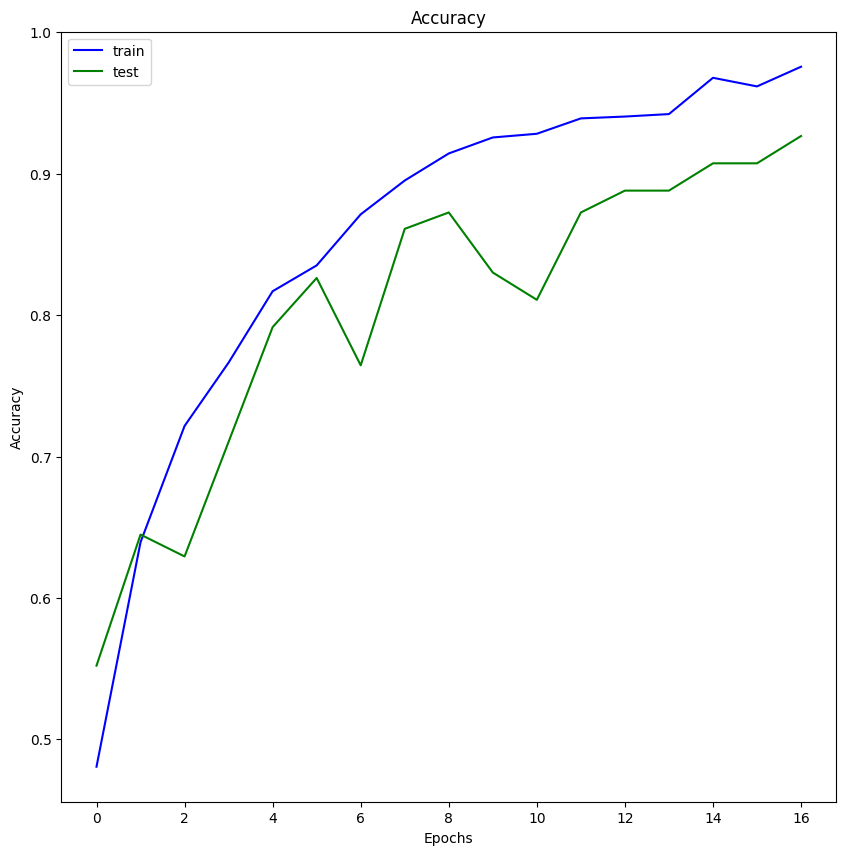

In [167]:
from sklearn.metrics import confusion_matrix
import itertools
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import RMSprop,Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
from keras.callbacks import EarlyStopping
model = Sequential()
model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.2))
model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same', activation='relu', input_shape = (128,128,1)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.2))
model.add(Conv2D(filters = 128, kernel_size = (2,2),padding = 'Same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.2))
model.add(Conv2D(filters = 256, kernel_size = (2,2),padding = 'Same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(1024,activation = "relu"))
model.add(Dense(4, activation = "softmax"))
#op = Adam(lr=0.001, beta_1=0.9, beta_2=0.999)
model.compile(optimizer = "adam" , loss = "categorical_crossentropy",metrics=["accuracy"])
epochs = 17
es = EarlyStopping(monitor='val_acc',mode='max',patience = 3)
batch_size = 25
imggen = ImageDataGenerator()
imggen.fit(X_train)
history = model.fit_generator(imggen.flow(X_train,y_train,batch_size =batch_size),epochs = epochs, validation_data = (X_val,y_val), steps_per_epoch = X_train.shape[0] // batch_size, callbacks = [es])
plt.plot(history.history["loss"],c = "red")
plt.plot(history.history["val_loss"],c = "black")
plt.title("Loss")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend(["train", "test"])
plt.rcParams["figure.figsize"] = (10,10)
plt.show()
plt.plot(history.history["accuracy"],c = "blue")
plt.plot(history.history["val_accuracy"],c = "green")
plt.title("Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epochs")
plt.rcParams["figure.figsize"] = (50,50)
plt.legend(["train", "test"])
score = model.evaluate(X_test, y_test, verbose = 0)
score[1]
pred = model.predict(X_test)
pred = np.argmax(pred,axis=1)
y_test_new = np.argmax(y_test,axis=1)
from sklearn.metrics import classification_report
print(classification_report(y_test_new,pred, target_names=categories))

In [ ]:
print(accuracy_score(y_test_new,pred))

In [ ]:
# 1. Logistic Regression
print("Training Score of Logistic Regression: ", lg.score(pca_train, ytrain)) #1 as
print("Testing Score of Logistic Regression: ", lg.score(pca_test, ytest))

Training Score of Logistic Regression:  0.990418118466899
Testing Score of Logistic Regression:  0.7665505226480837


In [ ]:
# 2. Random Forest
print("Training Score of Random Forest: ", rf.score(pca_train, ytrain)) 
print("Testing Score of Random Forest: ", rf.score(pca_test, ytest))

Training Score of Random Forest:  0.9995644599303136
Testing Score of Random Forest:  0.8937282229965157


In [ ]:
# 3. Decision Tree
print("Training Score of Decision Tree: ", dtc.score(pca_train, ytrain)) 
print("Testing Score of Decision Tree: ", dtc.score(pca_test, ytest))

Training Score of Decision Tree:  0.85801393728223
Testing Score of Decision Tree:  0.7560975609756098


In [ ]:
# 4. Naive Bayes (MultinomialNB)
print("Training Score of MultinomialNB: ", mnb.score(pca_train, ytrain)) 
print("Testing Score of MultinomialNB: ", mnb.score(pca_test, ytest))

Training Score of MultinomialNB:  0.5457317073170732
Testing Score of MultinomialNB:  0.5365853658536586


In [ ]:
# 5. Naive Bayes (GaussianNB)
print("Training Score of GaussianNB: ", gnb.score(pca_train, ytrain)) 
print("Testing Score of GaussianNB: ", gnb.score(pca_test, ytest))

#6 . CNN
train_pred = model.predict(X_train)
train_pred = np.argmax(train_pred, axis=1)
Y_train_ = np.argmax(y_train, axis=1)
print("Accuracy on training set:{:.2f}%".format(np.sum(train_pred==Y_train_)/len(Y_train_)*100))
test_pred = model.predict(X_test)
test_pred = np.argmax(test_pred, axis=1)
Y_test_ = np.argmax(y_test, axis=1)
print("Accuracy on testing set:{:.2f}%".format(np.sum(test_pred==Y_test_)/len(Y_test_)*100))


Training Score of GaussianNB:  0.6114982578397212
Testing Score of GaussianNB:  0.6010452961672473
73/73 [==============================] - 42s 578ms/step
Accuracy on training set:99.83%
9/9 [==============================] - 5s 575ms/step
Accuracy on testing set:93.38%


                  precision    recall  f1-score   support

        no_tumor       0.66      0.81      0.73        74
 pituitary_tumor       0.96      0.88      0.91       177
meningioma_tumor       0.57      0.63      0.60       131
    glioma_tumor       0.81      0.74      0.77       192

        accuracy                           0.77       574
       macro avg       0.75      0.76      0.75       574
    weighted avg       0.78      0.77      0.77       574



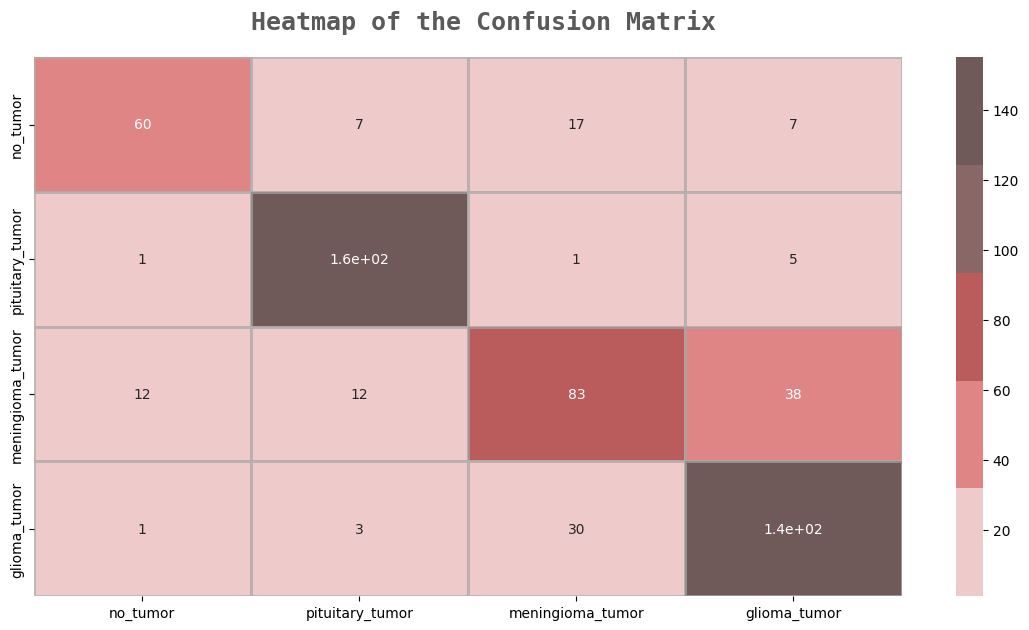

0.7665505226480837

In [ ]:
# 1. Logistic Regression
colors_green= ['#01411C','#4B6F44','#4F7942','#74C365','#D0F0C0']
colors_dark = ["#1F1F1F", "#313131", '#636363', '#AEAEAE', '#DADADA'] 
colors_red = ["#331313", "#582626", '#9E1717', '#D35151', '#E9B4B4'] 
pred_lg = lg.predict(pca_test)
np.where(ytest!=pred_lg)
print(classification_report(pred_lg,ytest, target_names=classes))
fig,ax=plt.subplots(1,1,figsize=(14,7))
sns.heatmap(confusion_matrix(ytest,pred_lg),ax=ax,xticklabels=classes,yticklabels=classes,annot=True,cmap=colors_red[::-1],alpha=0.7,linewidths=2,linecolor=colors_dark[3]) 
fig.text(s='Heatmap of the Confusion Matrix',size=18,fontweight='bold',
fontname='monospace',color=colors_dark[1],y=0.92,x=0.28,alpha=0.8) 
plt.show()
f1_score(ytest, pred_lg,average=None)
precision_score(ytest, pred_lg,average='micro')
recall_score(ytest, pred_lg,pos_label='positive',average='micro')

                  precision    recall  f1-score   support

        no_tumor       0.90      0.86      0.88        95
 pituitary_tumor       0.98      0.93      0.95       171
meningioma_tumor       0.85      0.80      0.82       154
    glioma_tumor       0.85      0.97      0.90       154

        accuracy                           0.89       574
       macro avg       0.89      0.89      0.89       574
    weighted avg       0.90      0.89      0.89       574



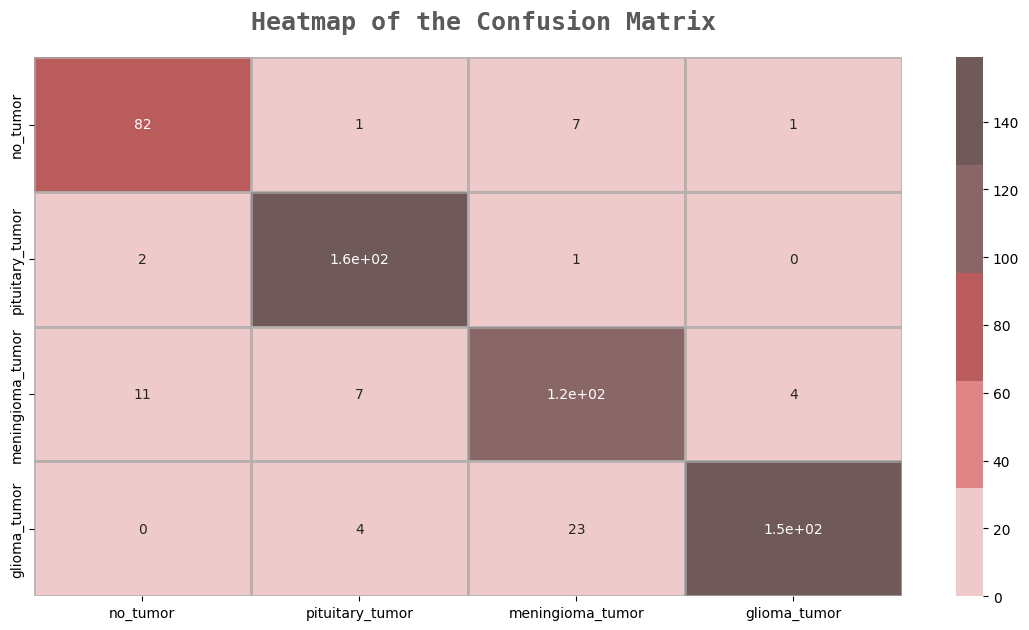

In [ ]:
# 2. Random Forest
pred_rf = rf.predict(pca_test)
np.where(ytest!=pred_rf)
print(classification_report(pred_rf,ytest, target_names=classes))
fig,ax=plt.subplots(1,1,figsize=(14,7))
sns.heatmap(confusion_matrix(ytest,pred_rf),ax=ax,xticklabels=classes,yticklabels=classes,annot=True,
cmap=colors_red[::-1],alpha=0.7,linewidths=2,linecolor=colors_dark[3])
fig.text(s='Heatmap of the Confusion Matrix', fontweight='bold', size=18
,y=0.92,x=0.28,alpha=0.8, fontname='monospace',color=colors_dark[1])
plt.show()

                  precision    recall  f1-score   support

        no_tumor       0.68      0.74      0.71        84
 pituitary_tumor       0.89      0.84      0.86       171
meningioma_tumor       0.78      0.60      0.68       189
    glioma_tumor       0.65      0.88      0.75       130

        accuracy                           0.76       574
       macro avg       0.75      0.77      0.75       574
    weighted avg       0.77      0.76      0.75       574



Text(0.28, 0.92, 'Heatmap of the Confusion Matrix')

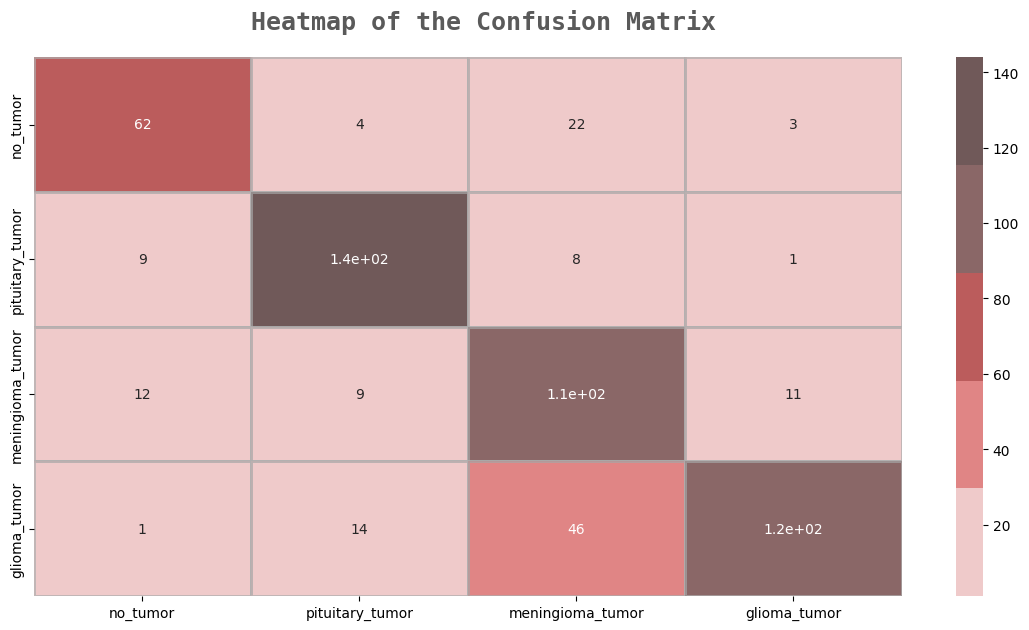

In [ ]:
# 3. Decision Tree
pred_dtc = dtc.predict(pca_test)
np.where(ytest!=pred_dtc)
print(classification_report(pred_dtc,ytest, target_names=classes))
fig,ax=plt.subplots(1,1,figsize=(14,7))
sns.heatmap(confusion_matrix(ytest,pred_dtc),ax=ax,xticklabels=classes,yticklabels= classes,annot=True,
cmap=colors_red[::-1],alpha=0.7,linewidths=2,linecolor=colors_dark[3])
fig.text(s='Heatmap of the Confusion Matrix', fontweight='bold', size=18
,y=0.92,x=0.28,alpha=0.8, fontname='monospace',color=colors_dark[1])

                  precision    recall  f1-score   support

        no_tumor       0.33      0.71      0.45        42
 pituitary_tumor       0.73      0.62      0.67       192
meningioma_tumor       0.16      0.40      0.23        58
    glioma_tumor       0.77      0.48      0.59       282

        accuracy                           0.54       574
       macro avg       0.50      0.55      0.49       574
    weighted avg       0.67      0.54      0.57       574



Text(0.28, 0.92, 'Heatmap of the Confusion Matrix')

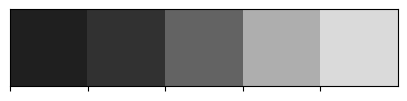

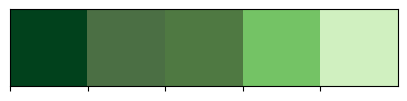

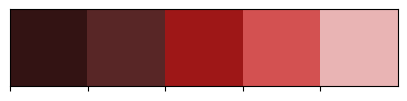

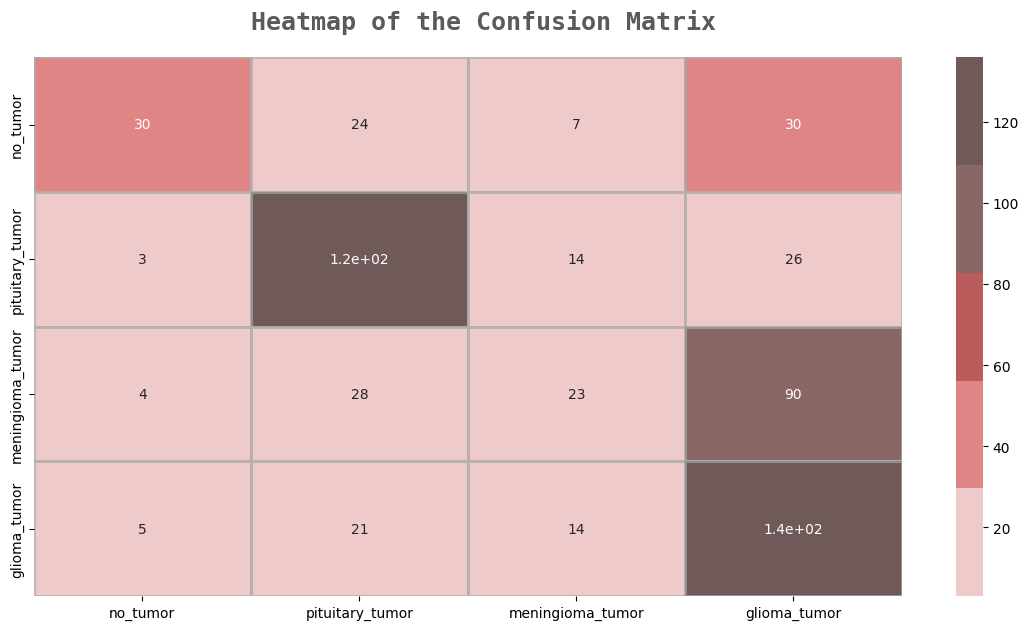

In [ ]:
# 4. Naive Bayes (MultinomailNB)
pred_mnb = mnb.predict(pca_test)
np.where(ytest!=pred_mnb)
print(classification_report(pred_mnb,ytest, target_names=classes)) 
colors_green= ['#01411C','#4B6F44','#4F7942','#74C365','#D0F0C0']
colors_dark = ["#1F1F1F", "#313131", '#636363', '#AEAEAE', '#DADADA'] 
colors_red = ["#331313", "#582626", '#9E1717', '#D35151', '#E9B4B4']
sns.palplot(colors_dark)
sns.palplot(colors_green)
sns.palplot(colors_red)
fig,ax=plt.subplots(1,1,figsize=(14,7))
sns.heatmap(confusion_matrix(ytest,pred_mnb),ax=ax,xticklabels=classes,yticklabels =classes,annot=True,
cmap=colors_red[::-1],alpha=0.7,linewidths=2,linecolor=colors_dark[3])
fig.text(s='Heatmap of the Confusion Matrix', fontweight='bold', size=18
,y=0.92,x=0.28,alpha=0.8, fontname='monospace',color=colors_dark[1])

                  precision    recall  f1-score   support

        no_tumor       0.57      0.71      0.63        73
 pituitary_tumor       0.78      0.74      0.76       172
meningioma_tumor       0.06      0.20      0.09        40
    glioma_tumor       0.90      0.55      0.68       289

        accuracy                           0.60       574
       macro avg       0.58      0.55      0.54       574
    weighted avg       0.76      0.60      0.66       574



Text(0.28, 0.92, 'Heatmap of the Confusion Matrix')

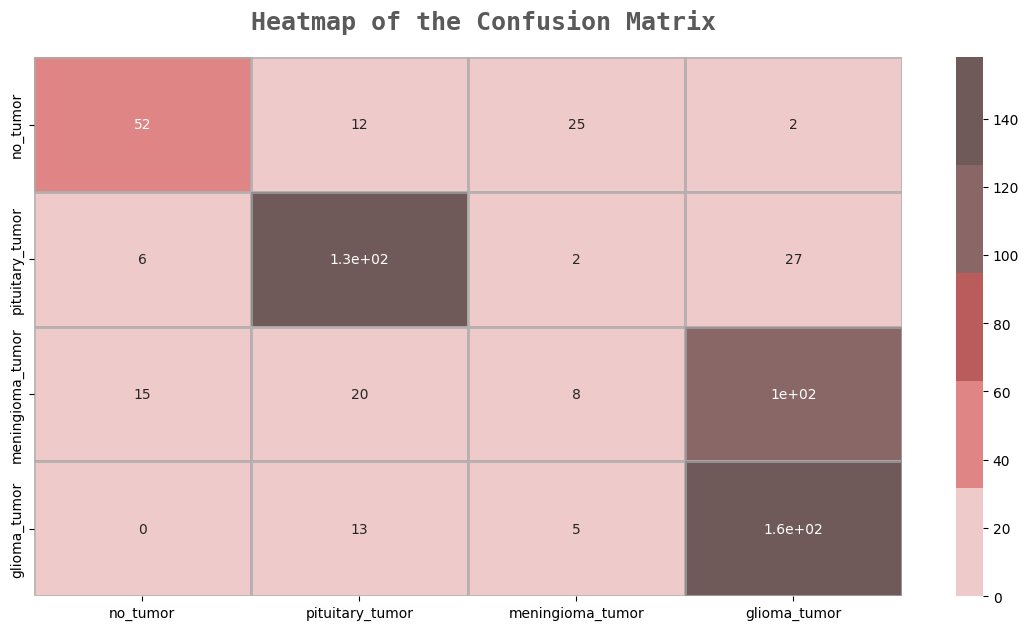

In [ ]:
# 5. Naive Bayes (GaussianNB)
pred_gnb = gnb.predict(pca_test)
np.where(ytest!=pred_gnb)
print(classification_report(pred_gnb,ytest,target_names=classes)) 
fig,ax=plt.subplots(1,1,figsize=(14,7))
sns.heatmap(confusion_matrix(ytest,pred_gnb),ax=ax,xticklabels=classes,yticklabels =classes,annot=True,
cmap=colors_red[::-1],alpha=0.7,linewidths=2,linecolor=colors_dark[3])
fig.text(s='Heatmap of the Confusion Matrix', fontweight='bold', size=18
,y=0.92,x=0.28,alpha=0.8, fontname='monospace',color=colors_dark[1])

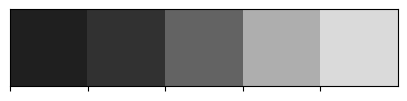

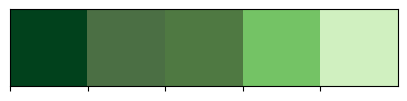

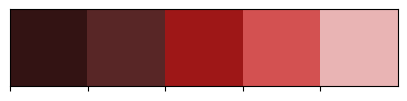

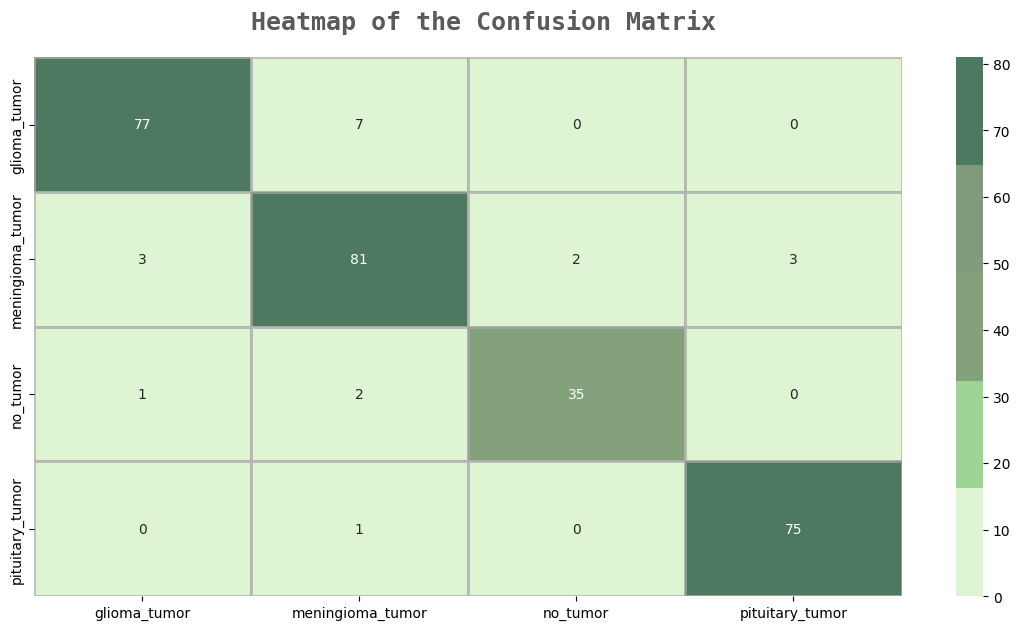

In [ ]:
colors_green= ['#01411C','#4B6F44','#4F7942','#74C365','#D0F0C0']
colors_dark = ["#1F1F1F", "#313131", '#636363', '#AEAEAE', '#DADADA'] 
colors_red = ["#331313", "#582626", '#9E1717', '#D35151', '#E9B4B4'] 
sns.palplot(colors_dark)
sns.palplot(colors_green)
sns.palplot(colors_red)
fig,ax=plt.subplots(1,1,figsize=(14,7))
sns.heatmap(confusion_matrix(y_test_new,pred),ax=ax,xticklabels=categories,yticklabels=categories,annot=True,
cmap=colors_green[::-1],alpha=0.7,linewidths=2,linecolor=colors_dark[3]) 
fig.text(s='Heatmap of the Confusion Matrix',size=18,fontweight='bold',
fontname='monospace',color=colors_dark[1],y=0.92,x=0.28,alpha=0.8) 
plt.show()

In [ ]:

# import ipywidgets as widgets 
# from PIL import Image
# import io
# import datetime
# def img_pred(uploader):
#     for name, file_info in uploader.value.items():
#         img = Image.open(io.BytesIO(file_info['content']))
#         opencvImage = cv2.cvtColor(np.array(img), cv2.COLOR_RGB2BGR) 
#         img = cv2.resize(opencvImage,(128,128))
#         img = img.reshape(-1,128,128,1)
#         x=datetime.datetime.now().strftime("%f")
#         p = model.predict(img)
#         p = np.argmax(p,axis=1)[0]
#         if p==0:
#             p='Pituitary Tumor'
#         elif p==1:
#             print('The model predicts no tumor')
#         elif p==2:
#             p='Glioma Tumor'
#         else:
#             p='Meningioma Tumor'
#         if p!=1:
#             print(f'The Model predicts that it is a {p}')
#         y=datetime.datetime.now().strftime("%f")
#         print("time taken to predict in microseconds")
#         print(int(y)-int(x))

In [ ]:
pip install -U ipywidgets

In [ ]:
!jupyter labextension install @jupyter-widgets/jupyterlab-manager

In [31]:
!jupyter nbextension install --py widgetsnbextension

Installing C:\Users\aneesh krishna\Downloads\anaconda\envs\jupyterlab\Lib\site-packages\widgetsnbextension\static -> jupyter-js-widgets
Making directory: C:\ProgramData\jupyter\nbextensions\jupyter-js-widgets\
Copying: C:\Users\aneesh krishna\Downloads\anaconda\envs\jupyterlab\Lib\site-packages\widgetsnbextension\static\extension.js -> C:\ProgramData\jupyter\nbextensions\jupyter-js-widgets\extension.js
Copying: C:\Users\aneesh krishna\Downloads\anaconda\envs\jupyterlab\Lib\site-packages\widgetsnbextension\static\extension.js.LICENSE.txt -> C:\ProgramData\jupyter\nbextensions\jupyter-js-widgets\extension.js.LICENSE.txt
Copying: C:\Users\aneesh krishna\Downloads\anaconda\envs\jupyterlab\Lib\site-packages\widgetsnbextension\static\extension.js.map -> C:\ProgramData\jupyter\nbextensions\jupyter-js-widgets\extension.js.map
- Validating: ok

    To initialize this nbextension in the browser every time the notebook (or other app) loads:
    
          jupyter nbextension enable widgetsnbexten

In [32]:

!jupyter nbextension enable --py --sys-prefix widgetsnbextension

Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: ok


In [33]:
!jupyter nbextension enable fileupload --user --py

Traceback (most recent call last):
  File "C:\Users\aneesh krishna\Downloads\anaconda\envs\jupyterlab\Scripts\jupyter-nbextension-script.py", line 10, in <module>
    sys.exit(main())
             ^^^^^^
  File "C:\Users\aneesh krishna\Downloads\anaconda\envs\jupyterlab\Lib\site-packages\jupyter_core\application.py", line 277, in launch_instance
    return super().launch_instance(argv=argv, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\aneesh krishna\Downloads\anaconda\envs\jupyterlab\Lib\site-packages\traitlets\config\application.py", line 992, in launch_instance
    app.start()
  File "C:\Users\aneesh krishna\Downloads\anaconda\envs\jupyterlab\Lib\site-packages\notebook\nbextensions.py", line 972, in start
    super().start()
  File "C:\Users\aneesh krishna\Downloads\anaconda\envs\jupyterlab\Lib\site-packages\jupyter_core\application.py", line 266, in start
    self.subapp.start()
  File "C:\Users\aneesh krishna\Downloads\anaconda\envs\jupyterlab\

In [13]:
import ipywidgets as widgets 
uploader = widgets.FileUpload()
display(uploader)
button = widgets.Button(description='Predict')
out = widgets.Output()    
def on_button_clicked(_):
    print("x")
button.on_click(on_button_clicked)
widgets.VBox([button,out])

FileUpload(value=(), description='Upload')

In [ ]:
models_metrics = {'Multinomial Naive Bayes' : [0.50],'Gaussian Naive Bayes' : [0.58],'Logistic Regression' : [0.75],'Decision Tree' : [0.76],'Random Forest' : [0.88],
'Proposed CNN Model' : [0.90]
}

In [ ]:
df_compare = pd.DataFrame(data = models_metrics)
df_compare.rename(index={0:'Accuracy'}, inplace=True)

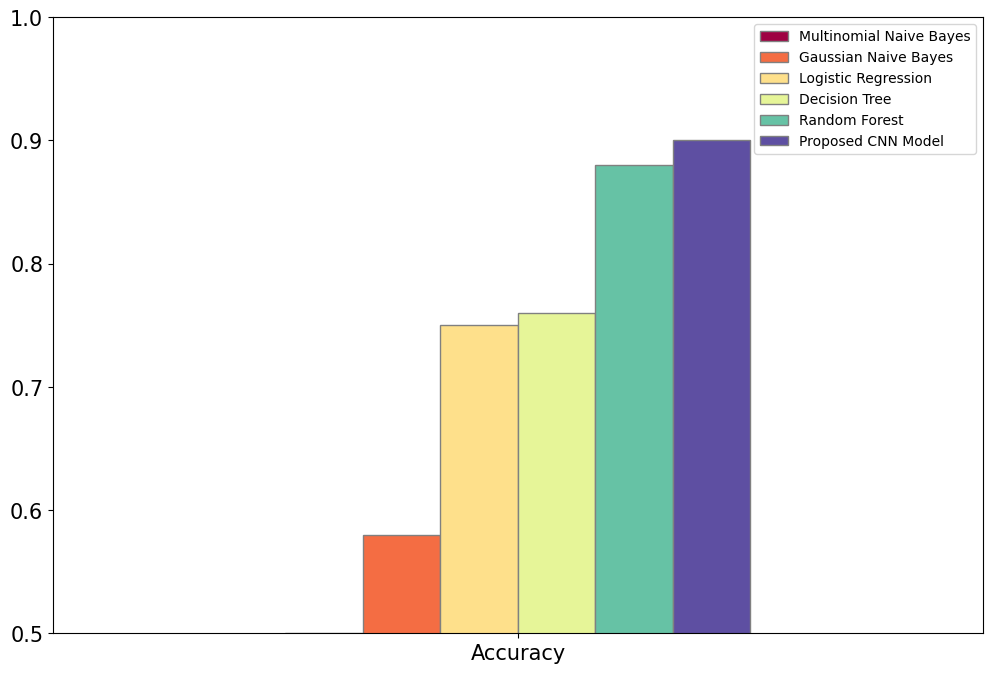

In [ ]:
ax = df_compare.plot(kind='bar', figsize = (12,8), ylim = (0.50, 1), 
colormap='Spectral',
rot = 0, 
edgecolor = 'grey', alpha = 1,fontsize=15)

In [ ]:
import tkinter as tk
from tkinter import filedialog
from PIL import Image, ImageTk
import cv2
import numpy as np
import datetime
import ctypes

# Get screen width and height
user32 = ctypes.windll.user32
screen_width = user32.GetSystemMetrics(0)
screen_height = user32.GetSystemMetrics(1)

# Create the Tkinter window
window = tk.Tk()
window.title("Image Prediction")
# window.geometry(f"{window_width}x{window_height}+{x}+{y}")

# Set the background image
background_photo = ImageTk.PhotoImage(file="new_bg_1.png", master=window)
background_label = tk.Label(window, image=background_photo)
background_label.pack(fill="both", expand=True)

import joblib
import pickle

# Function to perform image prediction
def img_pred(filepath):
    img = Image.open(filepath)
    opencvImage = cv2.cvtColor(np.array(img), cv2.COLOR_RGB2BGR)
    resized_image = cv2.resize(opencvImage, (128, 128))
    grayscale_image = cv2.cvtColor(resized_image, cv2.COLOR_BGR2GRAY)
    input_image = np.expand_dims(grayscale_image, axis=0)
    input_image = np.expand_dims(input_image, axis=-1)
    input_image = input_image.astype('float32') / 255.0
    p = model.predict(input_image)
    print(model.predict(input_image))
    p = np.argmax(p, axis=1)[0]
    print(p)
    if p == 0:
        p = 'Glioma Tumor'
    elif p == 1:
        p = 'Meningioma Tumor'
    elif p == 2:
        p = 'No tumor'
    else:
        p = 'pituitary Tumor'

    prediction_var.set(f'The Model predicts that it is a {p}')

    y = datetime.datetime.now().strftime("%f")
    time_taken = int(y) - int(x)
    time_label.configure(text=f"Time taken to predict: {time_taken} microseconds", fg="#000000")

# Function to handle file selection
def select_file():
    filepath = filedialog.askopenfilename()
    if filepath:
        img_pred(filepath)

# Create widgets
select_button = tk.Button(window, text="Select Image", command=select_file, bg="#00688B", fg="lightpink")
select_button.config(font=("Arial", 12), bd=0, relief=tk.FLAT, padx=10, pady=5)
select_button.config(activebackground="#0056b3", activeforeground="#FFFFFF")
prediction_var = tk.StringVar()
prediction_label = tk.Label(window, textvariable=prediction_var, bg='lightpink', fg='black')
prediction_label.config(font=("Helvetica", 26, "bold"))
prediction_label.pack()
time_label = tk.Label(window, text="")
time_label.config(font=("Arial", 12))
time_label.configure(bg='lightblue')

# Place the widgets in the window
select_button.place(x=10, y=430)
prediction_label.place(x=10, y=490)
time_label.place(x=10, y=580)

# Start the Tkinter event loop
window.mainloop()


1/1 [==============================] - 0s 389ms/step
[[9.8420185e-01 1.5797980e-02 1.2380832e-07 1.2041781e-07]]
0
1/1 [==============================] - 0s 54ms/step
[[5.6041919e-02 9.4395804e-01 8.2644314e-10 5.2916982e-10]]
1
1/1 [==============================] - 0s 55ms/step
[[1.5041890e-10 2.7141045e-06 5.6991996e-07 9.9999666e-01]]
3
1/1 [==============================] - 0s 59ms/step
[[1.3660292e-06 2.8753635e-03 9.9712270e-01 5.6468082e-07]]
2
